In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv('C:/Users/ABHISHEK DEORE/OneDrive/Desktop/Projects/Credit Card Fraud Detection/data/creditcard.csv')

In [3]:
# List of important features based on previous analysis
important_features = ['V17', 'V14', 'V12', 'V16', 'V10', 'V11', 'V4', 'V9', 'V7', 'V18', 'V26', 'V3', 'V1', 'V20', 'V21', 'Amount', 'Time', 'Class']

# Create a new dataframe with only the important features
df_important = df[important_features].copy()

In [4]:
df_important.head()

,V17,V14,V12,V16,V10,V11,V4,V9,V7,V18,V26,V3,V1,V20,V21,Amount,Time,Class
0,0.207971,-0.311169,-0.617801,-0.470401,0.090794,-0.551600,1.378155,0.363787,0.239599,0.025791,-0.189115,2.536347,-1.359807,0.251412,-0.018307,149.62,0.0,0
1,-0.114805,-0.143772,1.065235,0.463917,-0.166974,1.612727,0.448154,-0.255425,-0.078803,-0.183361,0.125895,0.166480,1.191857,-0.069083,-0.225775,2.69,0.0,0
2,1.109969,-0.165946,0.066084,-2.890083,0.207643,0.624501,0.379780,-1.514654,0.791461,-0.121359,-0.139097,1.773209,-1.358354,0.524980,0.247998,378.66,1.0,0
3,-0.684093,-0.287924,0.178228,-1.059647,-0.054952,-0.226487,-0.863291,-1.387024,0.237609,1.965775,-0.221929,1.792993,-0.966272,-0.208038,-0.108300,123.50,1.0,0
4,-0.237033,-1.119670,0.538196,-0.451449,0.753074,-0.822843,0.403034,0.817739,0.592941,-0.038195,0.502292,1.548718,-1.158233,0.408542,-0.009431,69.99,2.0,0


In [5]:
df_important.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V17     284807 non-null  float64
 1   V14     284807 non-null  float64
 2   V12     284807 non-null  float64
 3   V16     284807 non-null  float64
 4   V10     284807 non-null  float64
 5   V11     284807 non-null  float64
 6   V4      284807 non-null  float64
 7   V9      284807 non-null  float64
 8   V7      284807 non-null  float64
 9   V18     284807 non-null  float64
 10  V26     284807 non-null  float64
 11  V3      284807 non-null  float64
 12  V1      284807 non-null  float64
 13  V20     284807 non-null  float64
 14  V21     284807 non-null  float64
 15  Amount  284807 non-null  float64
 16  Time    284807 non-null  float64
 17  Class   284807 non-null  int64  
dtypes: float64(17), int64(1)
memory usage: 39.1 MB


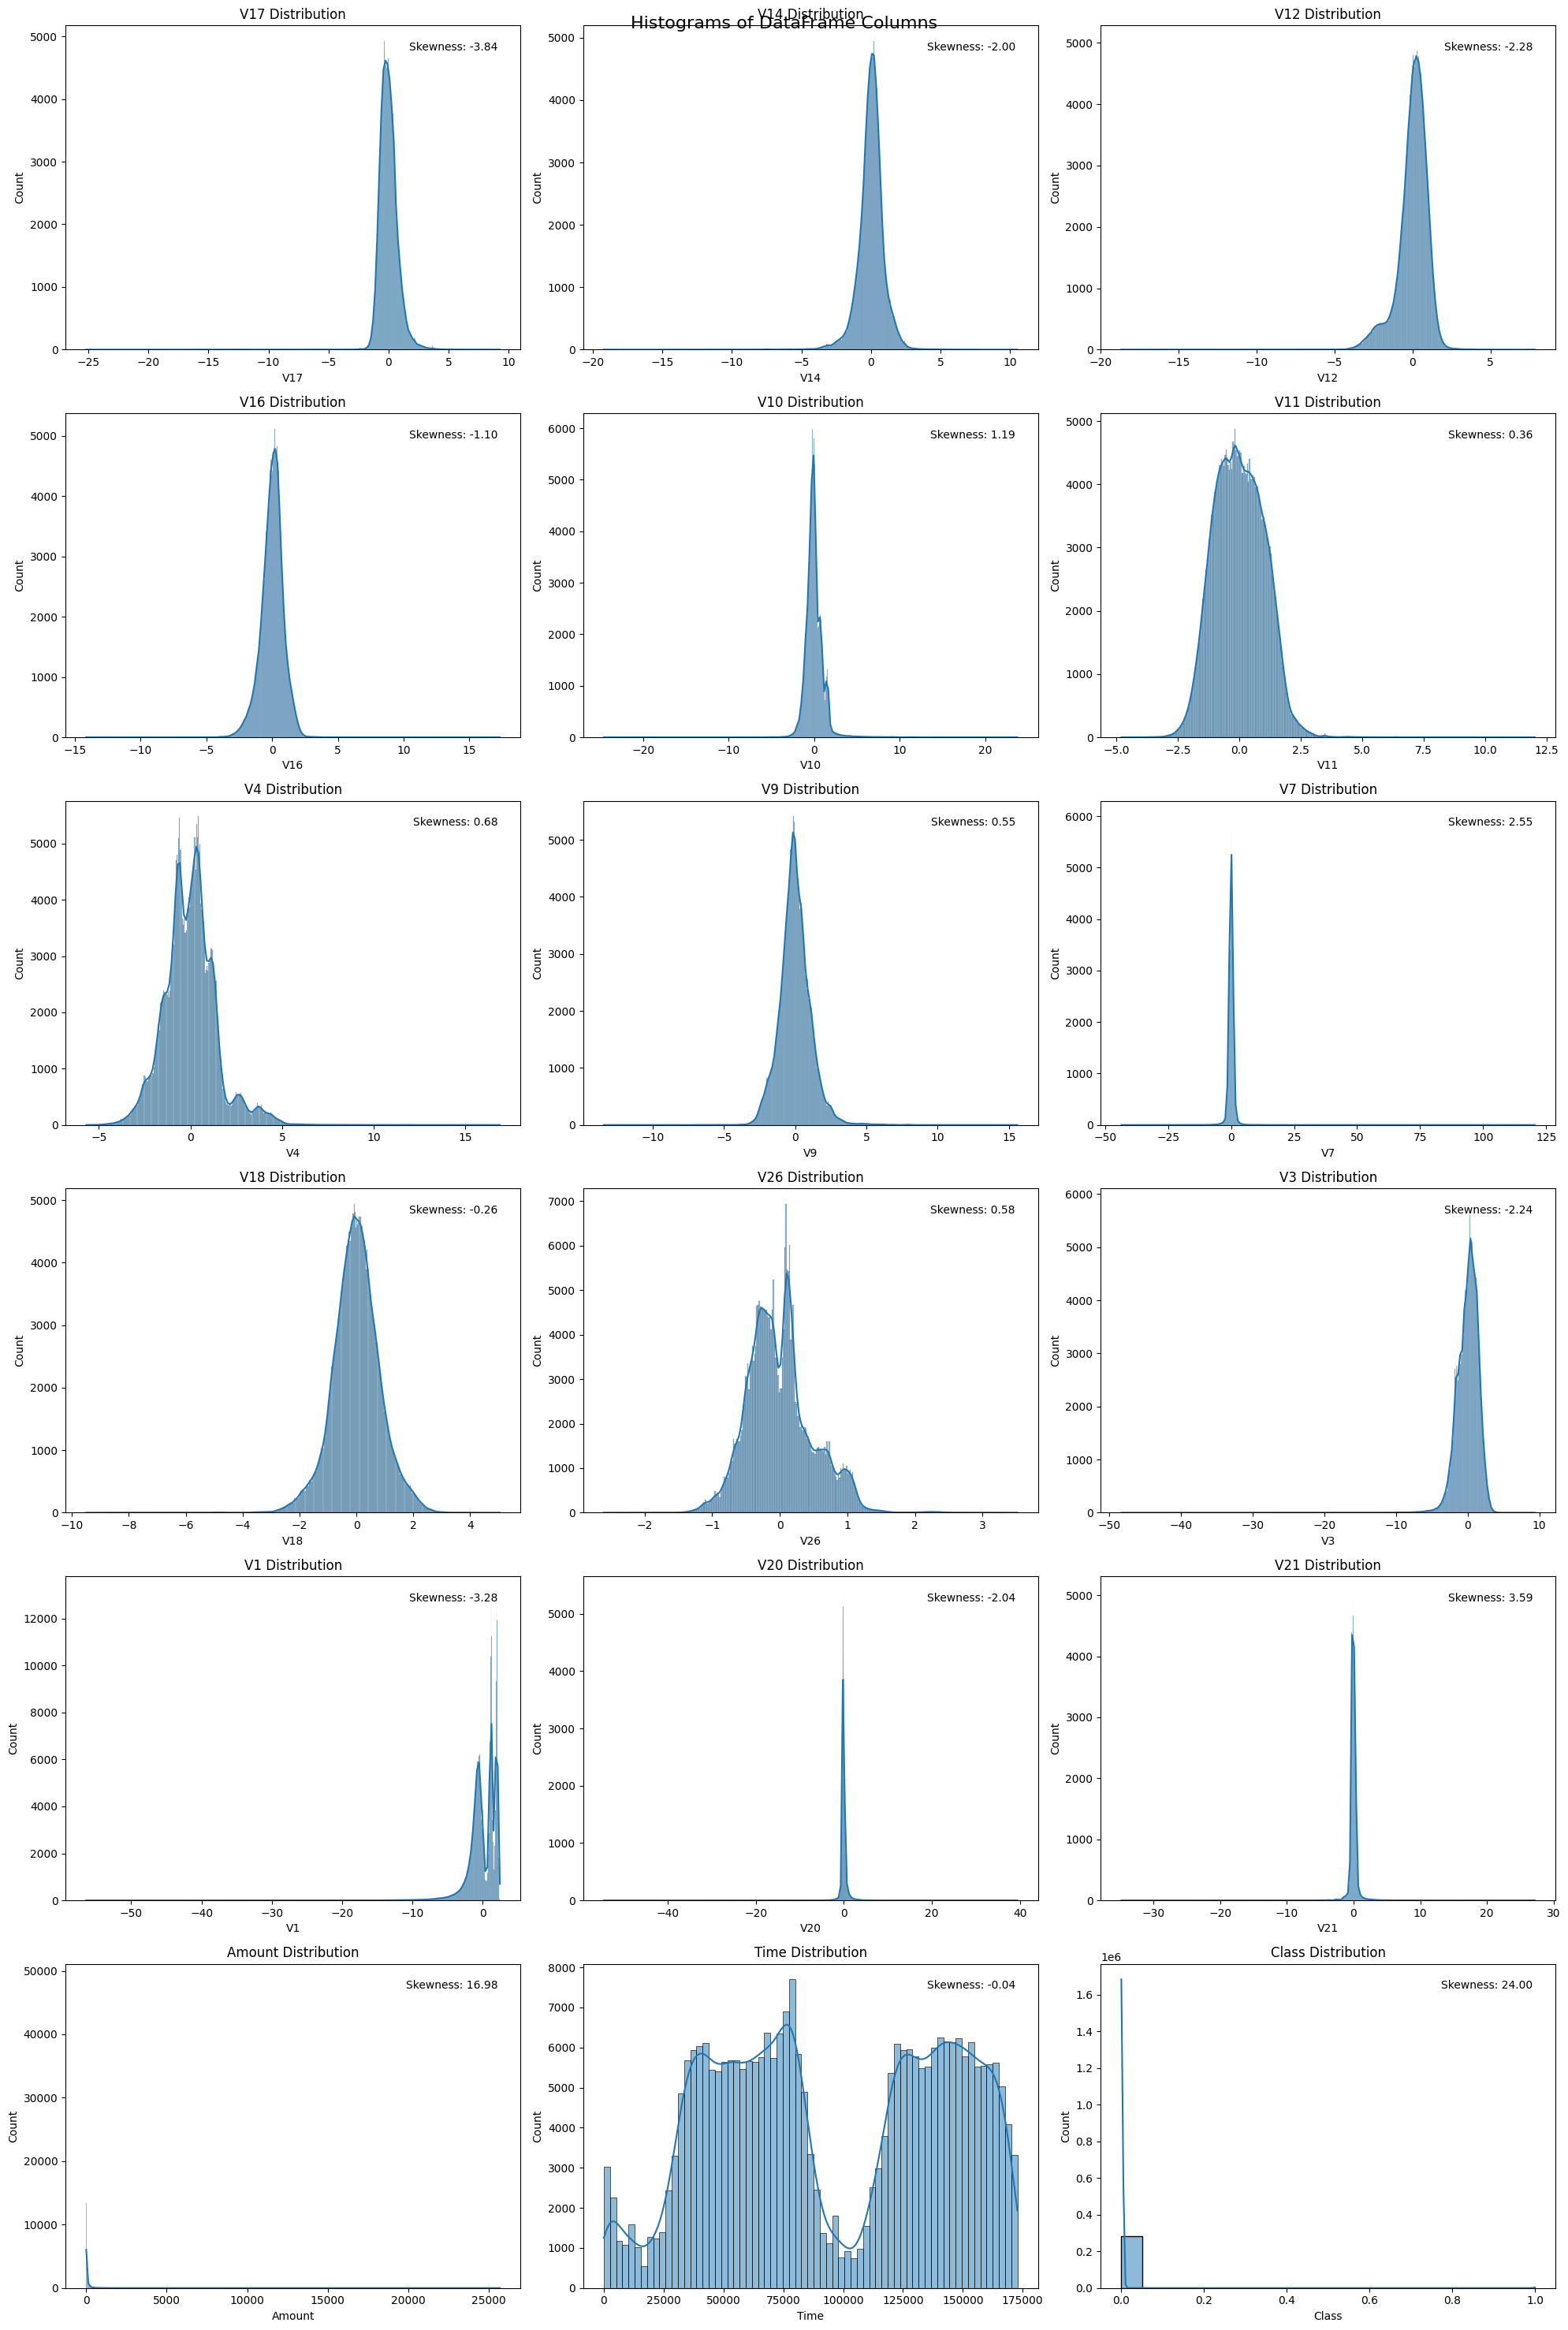

In [6]:

# Create a figure with subplots for each column
fig, axes = plt.subplots(6, 3, figsize=(20, 30))
fig.suptitle('Histograms of DataFrame Columns', fontsize=16)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot histograms for each column
for i, column in enumerate(df_important.columns):
    sns.histplot(df_important[column], ax=axes[i], kde=True)
    axes[i].set_title(f'{column} Distribution')
    axes[i].set_xlabel(column)
    
    # Calculate skewness
    skewness = df_important[column].skew()
    axes[i].text(0.95, 0.95, f'Skewness: {skewness:.2f}', 
                 transform=axes[i].transAxes, 
                 verticalalignment='top', 
                 horizontalalignment='right')

# Remove any unused subplots
for i in range(len(df_important.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


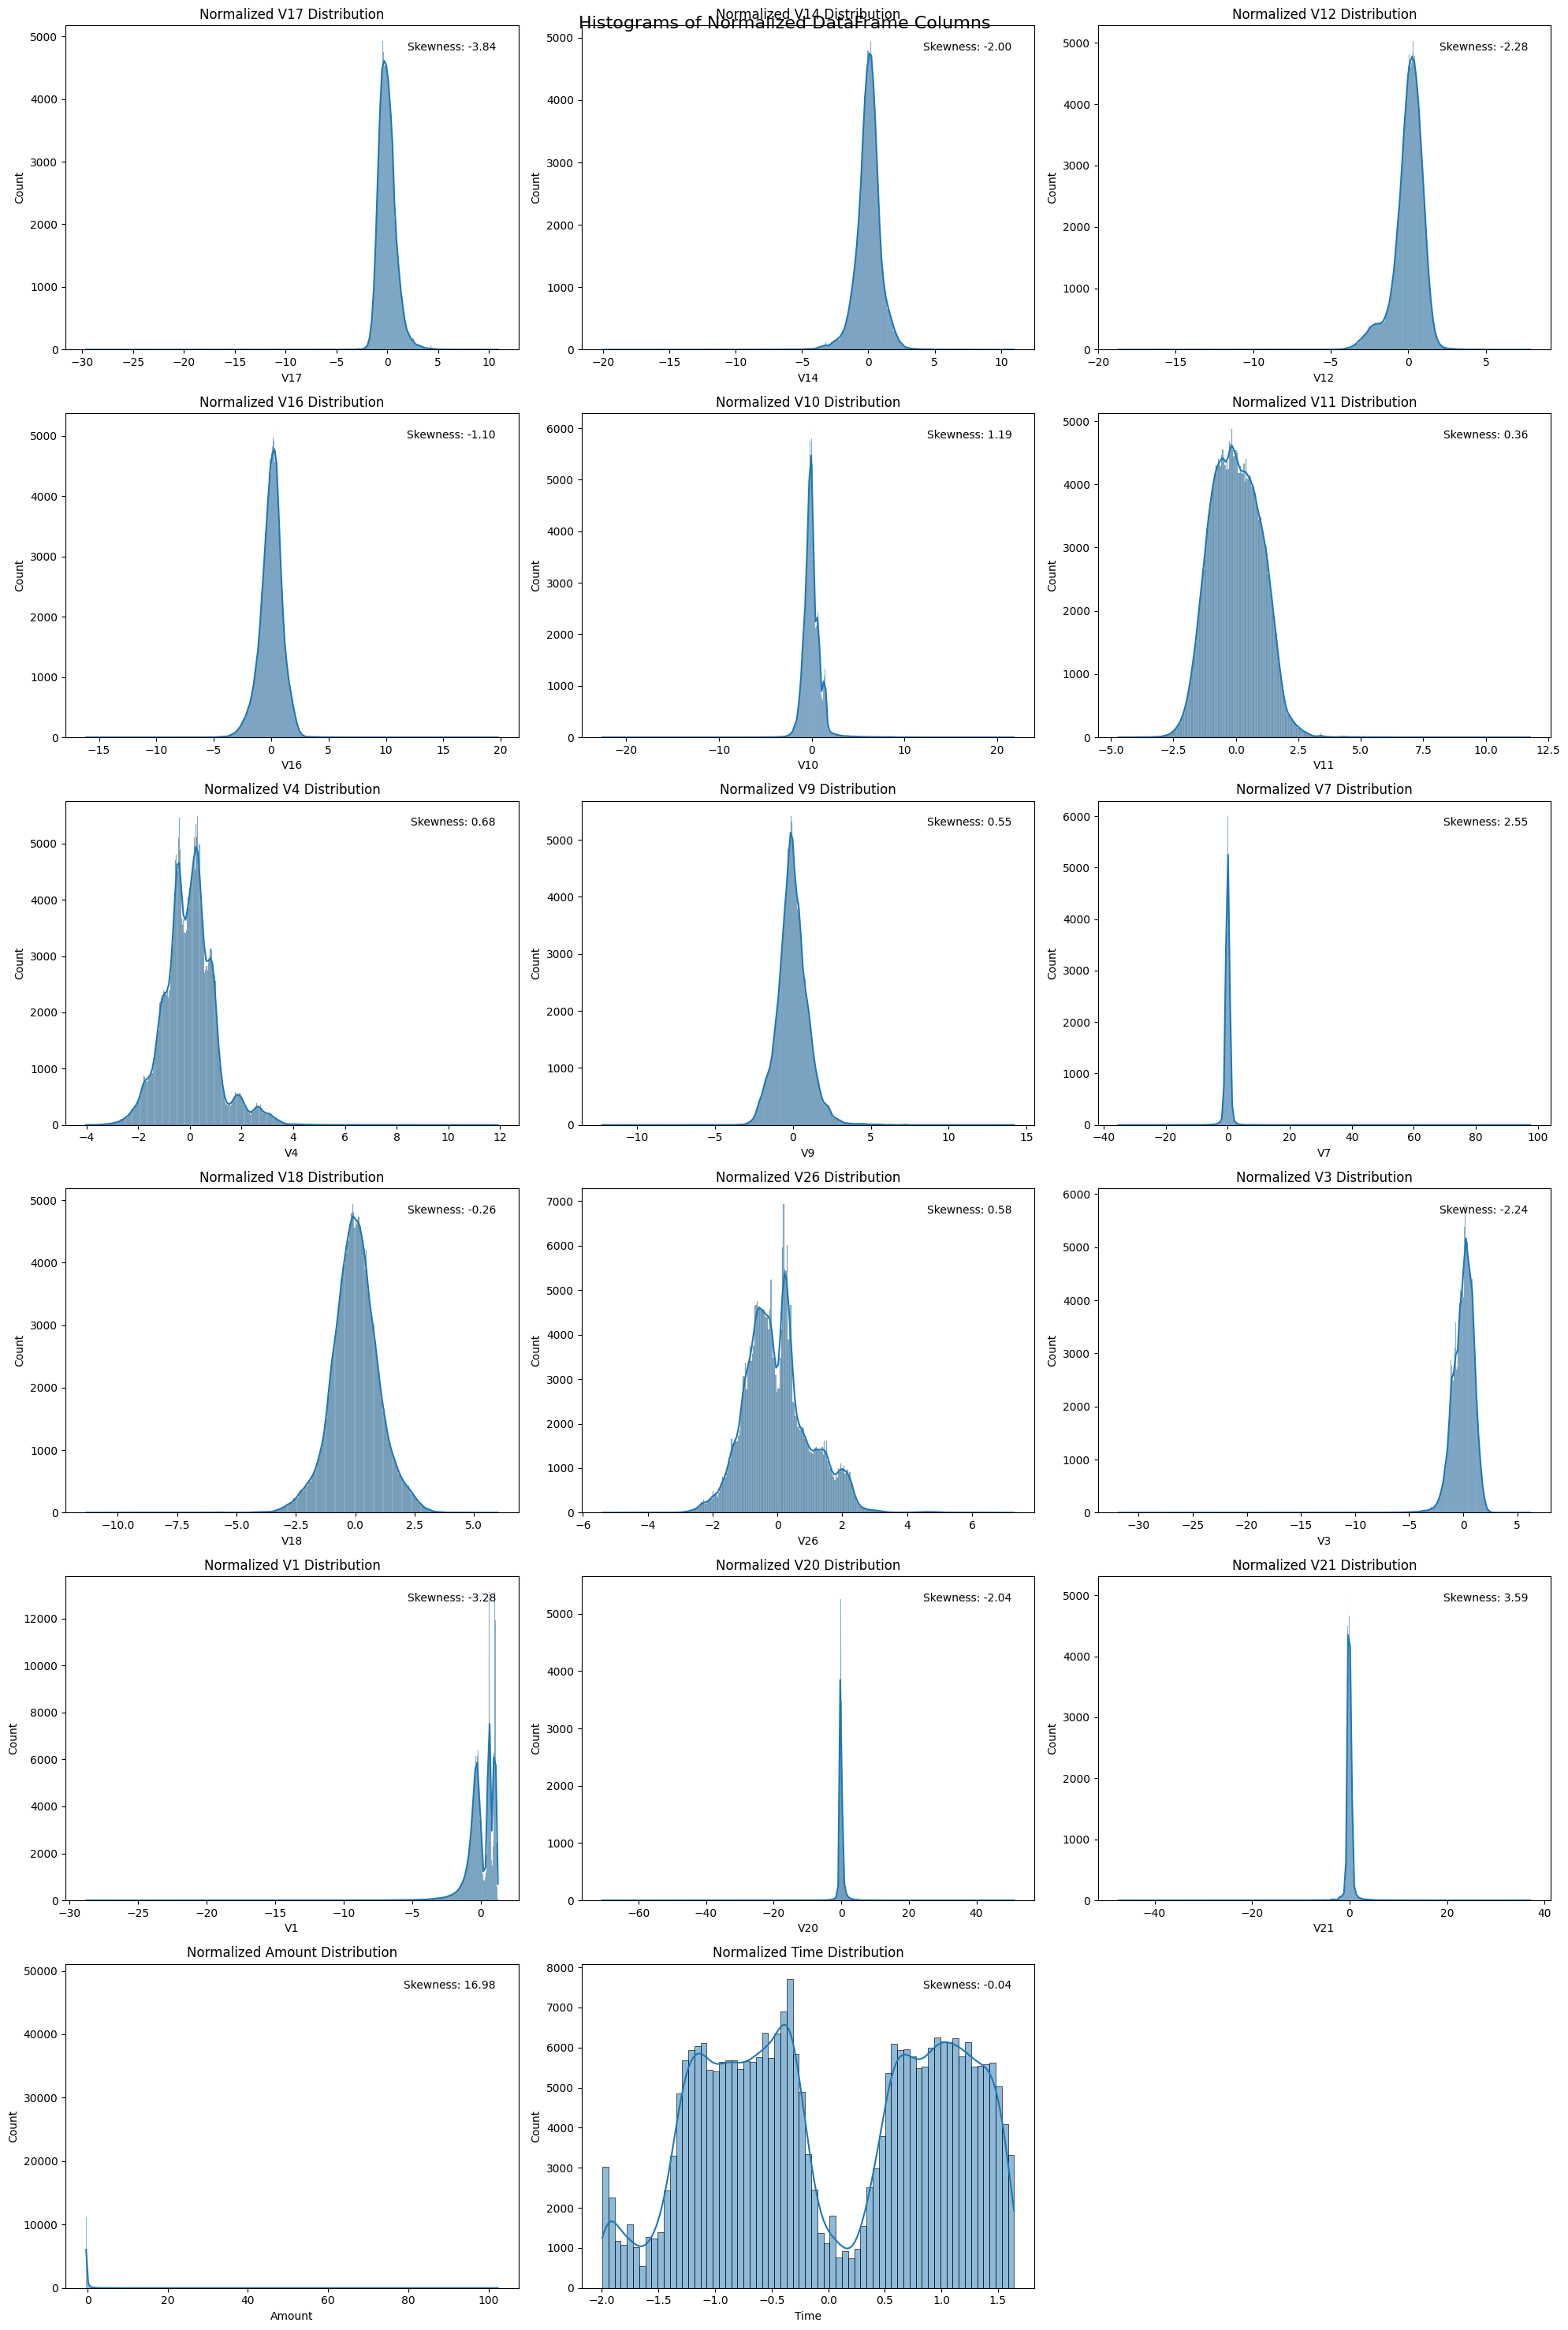

In [7]:
from sklearn.preprocessing import StandardScaler

def normalize_and_visualize(df):
    # Create a copy of the DataFrame to avoid modifying the original
    df_normalized = df.copy()
    
    # Initialize the StandardScaler
    scaler = StandardScaler()
    
    # Identify numeric columns (excluding 'Class' if it's present)
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    if 'Class' in numeric_columns:
        numeric_columns.remove('Class')
    
    # Apply standard scaling to numeric columns
    df_normalized[numeric_columns] = scaler.fit_transform(df[numeric_columns])
    
    # Set up the plot
    n_cols = 3
    n_rows = (len(numeric_columns) - 1) // n_cols + 1
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
    fig.suptitle('Histograms of Normalized DataFrame Columns', fontsize=16)
    
    # Flatten the axes array for easier iteration
    axes = axes.flatten()
    
    # Plot histograms for each normalized column
    for i, column in enumerate(numeric_columns):
        sns.histplot(df_normalized[column], ax=axes[i], kde=True)
        axes[i].set_title(f'Normalized {column} Distribution')
        axes[i].set_xlabel(column)
        
        # Calculate skewness
        skewness = df_normalized[column].skew()
        axes[i].text(0.95, 0.95, f'Skewness: {skewness:.2f}', 
                     transform=axes[i].transAxes, 
                     verticalalignment='top', 
                     horizontalalignment='right')
    
    # Remove any unused subplots
    for i in range(len(numeric_columns), len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()
        
    return df_normalized


normalized_df = normalize_and_visualize(df_important)

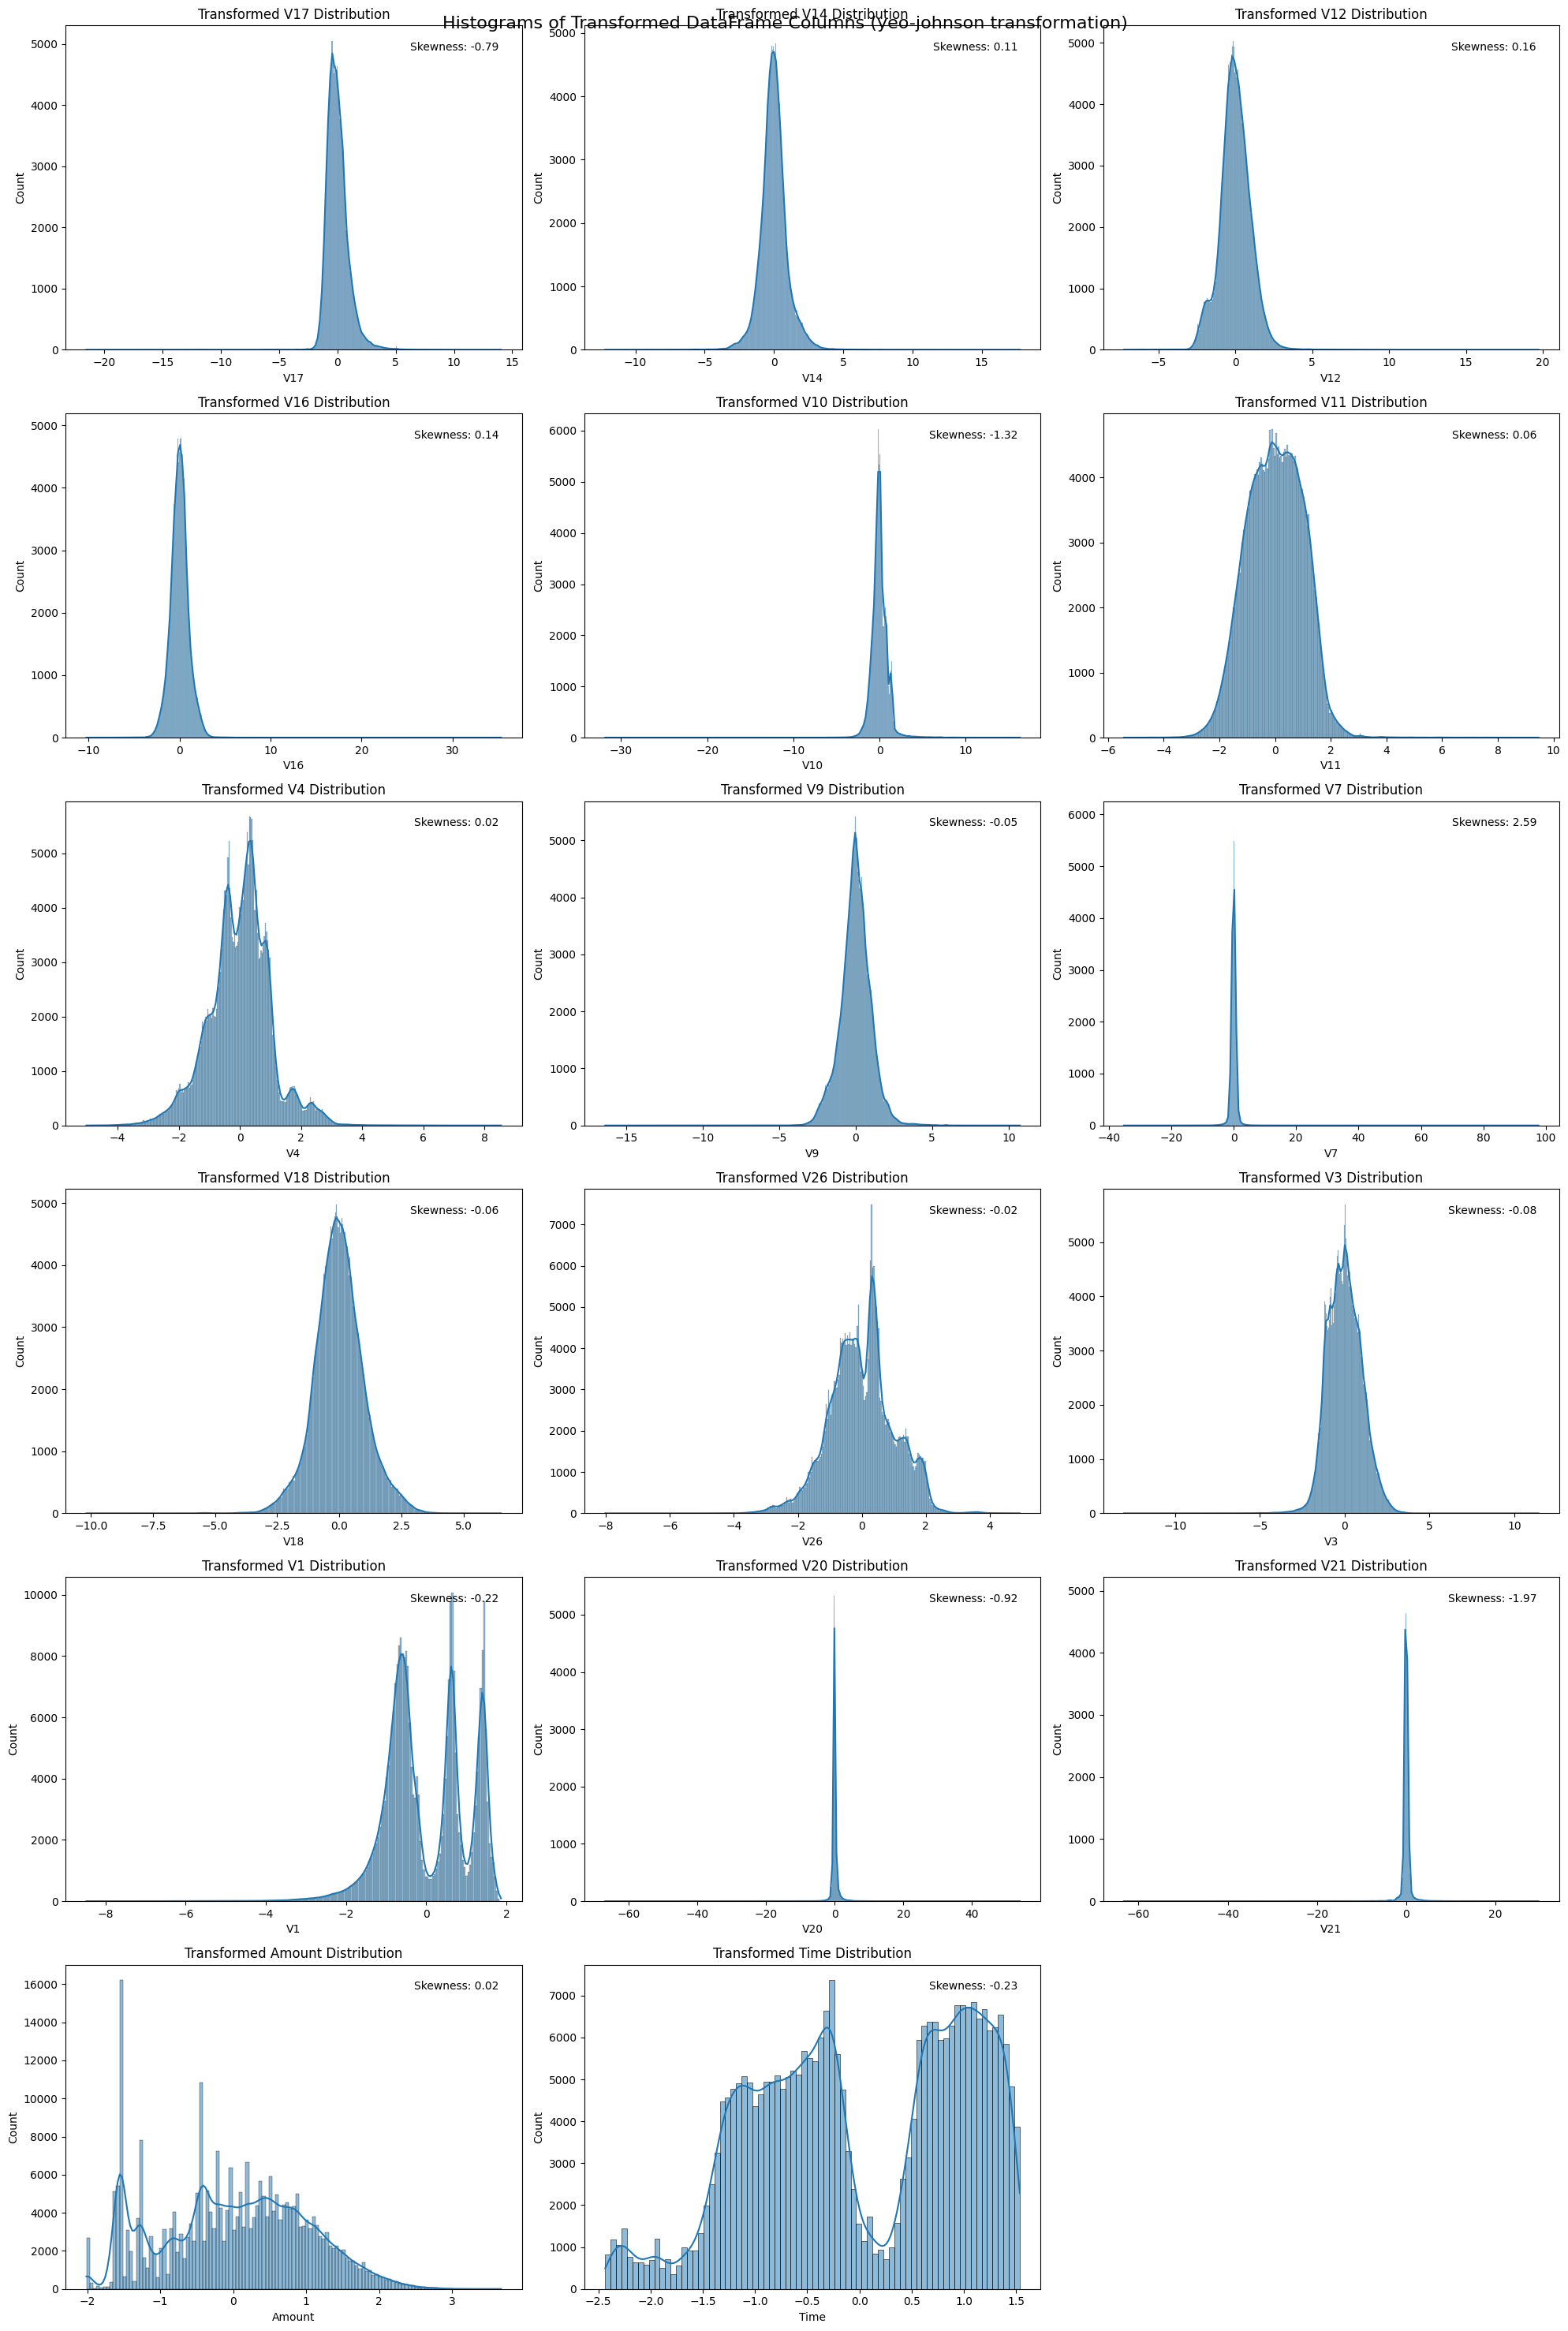

In [8]:
from sklearn.preprocessing import PowerTransformer

def transform_and_visualize(df, method='yeo-johnson'):
    # Create a copy of the DataFrame to avoid modifying the original
    df_transformed = df.copy()
    
    # Initialize the PowerTransformer
    pt = PowerTransformer(method=method, standardize=True)
    
    # Identify numeric columns (excluding 'Class' if it's present)
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    if 'Class' in numeric_columns:
        numeric_columns.remove('Class')
    
    # Apply Yeo-Johnson transformation to numeric columns
    df_transformed[numeric_columns] = pt.fit_transform(df[numeric_columns])
    
    # Set up the plot
    n_cols = 3
    n_rows = (len(numeric_columns) - 1) // n_cols + 1
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
    fig.suptitle(f'Histograms of Transformed DataFrame Columns ({method} transformation)', fontsize=16)
    
    # Flatten the axes array for easier iteration
    axes = axes.flatten()
    
    # Plot histograms for each transformed column
    for i, column in enumerate(numeric_columns):
        sns.histplot(df_transformed[column], ax=axes[i], kde=True)
        axes[i].set_title(f'Transformed {column} Distribution')
        axes[i].set_xlabel(column)
        
        # Calculate skewness
        skewness = df_transformed[column].skew()
        axes[i].text(0.95, 0.95, f'Skewness: {skewness:.2f}', 
                     transform=axes[i].transAxes, 
                     verticalalignment='top', 
                     horizontalalignment='right')
    
    # Remove any unused subplots
    for i in range(len(numeric_columns), len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()
    
    return df_transformed

# Usage:
transformed_df = transform_and_visualize(df_important)

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [10]:
# Prepare the data
X = transformed_df.drop('Class', axis=1)
y = transformed_df['Class']

In [11]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y ,random_state=42)

In [12]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [14]:
# Isolation Forest
iso_forest = IsolationForest(contamination=0.5, random_state=42)  # contamination=0.5 as classes are now balanced
iso_forest.fit(X_train_resampled)
y_scores_if = -iso_forest.decision_function(X_test_scaled)  # negative as lower scores indicate anomalies


In [15]:
# Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.5, novelty=True)  # contamination=0.5 as classes are now balanced
lof.fit(X_train_resampled)
y_scores_lof = -lof.decision_function(X_test_scaled)  # negative as lower scores indicate anomalies


In [16]:
# Calculate ROC curve and AUC for both models
fpr_if, tpr_if, _ = roc_curve(y_test, y_scores_if)
roc_auc_if = auc(fpr_if, tpr_if)

In [17]:
fpr_lof, tpr_lof, _ = roc_curve(y_test, y_scores_lof)
roc_auc_lof = auc(fpr_lof, tpr_lof)

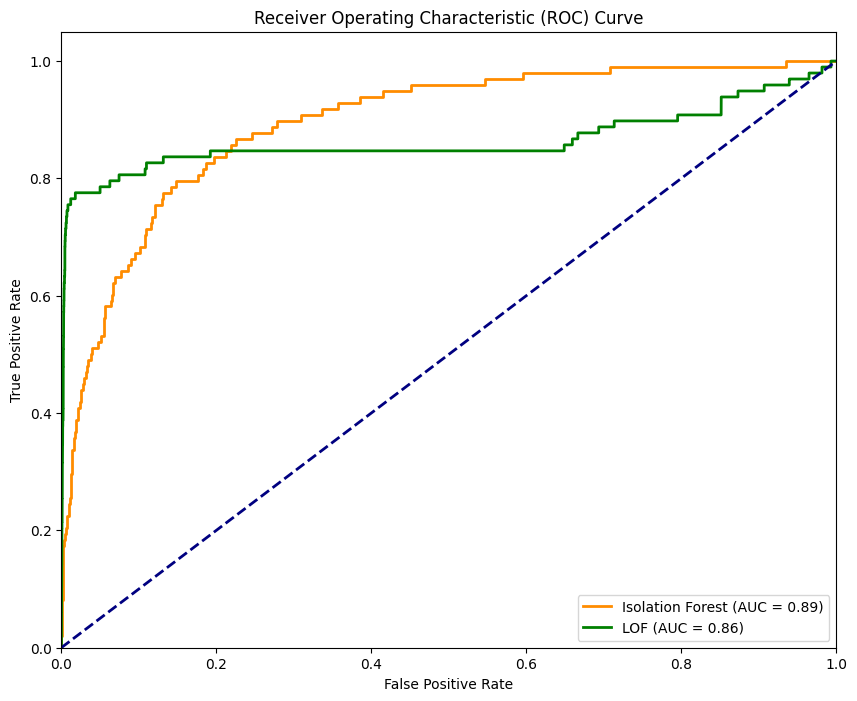

In [20]:

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_if, tpr_if, color='darkorange', lw=2, label=f'Isolation Forest (AUC = {roc_auc_if:.2f})')
plt.plot(fpr_lof, tpr_lof, color='green', lw=2, label=f'LOF (AUC = {roc_auc_lof:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig("roc")
plt.show()


In [19]:
# Print AUC scores
print(f"AUC score for Isolation Forest: {roc_auc_if:.4f}")
print(f"AUC score for Local Outlier Factor: {roc_auc_lof:.4f}")

AUC score for Isolation Forest: 0.8942
AUC score for Local Outlier Factor: 0.8640
